# ROCK, PAPER, SCISSORS, spOcK! 
## Classifying Gestures by Reading Muscle Activity
#### Jeddahlyn Gacera <br /> MSDS 2020 <br /> ML Individual Project

## Highlights and Results
The objective of this study is to apply the learnings of Machine Learning class to real world datasets like electrical muscle activity and explore the current trend of Artificial Intelligence in the field of Prosthetics.

Prosthetic implant is an artificial device that replaces a missing body part, which may be lost through trauma, disease, or congenital disorder. Prostheses intend to help people with disabilities to restore the normal functions of what they've lost. A way to improve these devices is through the help of an electromyography (EMG), an electrodiagnostic medicine technique for evaluating and recording the electrical activity produced by skeletal muscles, which then can be analyzed by a computer to detect the gesture intended to be made by the muscles.

In this study, Machine Learning algorithms have been used to **11,678 rows of muscle activity Kaggle data** to create a model that can predict the **classification of a gesture among 4 classes: rock, paper, scissors, or OK**, with a test **accuracy of 96.54%**, which is higher than the methods used by others who have explored the dataset.

In addition, companies like **Neuralink by Elon Musk, Kernel by Bryan Johnson, and CTRL-Labs by Thomas Reardon** have done breakthroughs as they aim to **read and write from the brain** by tapping directly into the nervous system to decode individual neurons.

## Methodology

### 1. Data Description and Processing

<img src="kaggle.png" width="300"/>

Data used in this study is from **Kaggle**, an online community of data scientists and machine learners, owned by Google LLC that allows users to find and publish data sets, explore and build models in a web-based data-science environment.

<img src="kirill_yashuk.png" width="350" align="left" />
<img src="classify_page.png" width="600" align="left" />

Uploaded by **Kirill Yashuk** 8 months ago, the dataset found here: https://www.kaggle.com/kyr7plus/emg-4 entitled **Classify gestures by reading muscle activity** consists of **4 CSV files** corresponding to each of the **classes**:
* Class **0**: rock
* Class **1**: scissors
* Class **2**: paper
* Class **3**: OK

All 4 files were appended into 1 dataset wherein Machine Learning algorithms were applied.

#### Load needed libraries

In [28]:
# Libraries needed
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#### Load data using Pandas
#### ROCK dataset

In [9]:
df0 = pd.read_csv('0.csv', header = None)

In [4]:
df0.head(2)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0


#### SCISSORS dataset

In [ ]:
df1 = pd.read_csv('1.csv', header = None)

In [5]:
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-7.0,-1.0,-1.0,0.0,-10.0,-10.0,-1.0,1.0,-5.0,-5.0,...,6.0,-4.0,-3.0,-5.0,-3.0,15.0,11.0,-4.0,-5.0,1
1,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,...,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1


#### PAPER dataset

In [ ]:
df2 = pd.read_csv('2.csv', header = None)

In [6]:
df2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,4.0,19.0,-9.0,-7.0,-3.0,-36.0,-6.0,-23.0,3.0,-21.0,...,9.0,-14.0,-2.0,-3.0,-4.0,-21.0,7.0,-8.0,-12.0,2
1,-1.0,12.0,20.0,7.0,20.0,-73.0,-4.0,-2.0,4.0,5.0,...,-3.0,-5.0,-2.0,0.0,-4.0,-7.0,5.0,6.0,9.0,2


#### OK dataset

In [2]:
df3 = pd.read_csv('3.csv', header = None)

In [7]:
df3.head(2)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-22.0,-9.0,-6.0,-1.0,21.0,26.0,-2.0,5.0,5.0,0.0,...,-10.0,-15.0,-6.0,-3.0,3.0,20.0,25.0,1.0,1.0,3
1,-7.0,0.0,1.0,0.0,-13.0,-18.0,0.0,-9.0,-6.0,-2.0,...,-1.0,11.0,-4.0,-5.0,-4.0,3.0,-8.0,-7.0,-3.0,3


#### Combine all datasets to one main dataframe

In [ ]:
df = pd.concat([df0, df1, df2, df3])

In [74]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0


#### 11,678 rows by 65 columns where the 65th column consists of the classification labels

In [8]:
df.shape

(11678, 65)

### 2. Exploratory Data Analysis

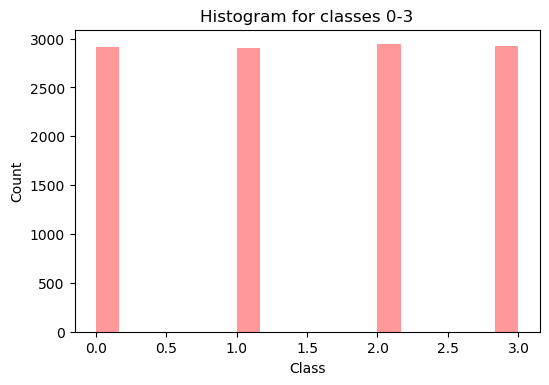

In [42]:
fig, ax = plt.subplots(dpi=100)
ax = sns.distplot(df[64], kde=False, color='red')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Histogram for classes 0-3')
fig;

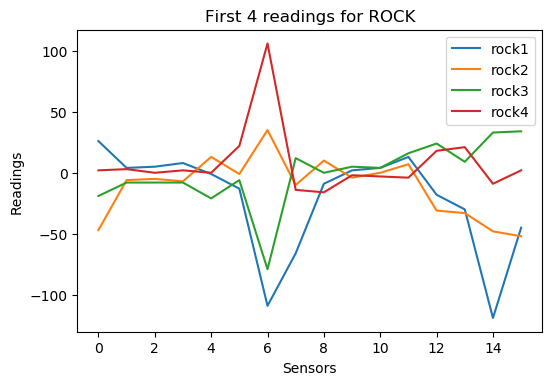

In [75]:
fig, ax = plt.subplots(dpi=100)
line0, = ax.plot(df0[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][0:1].T, label='rock1')
line1, = ax.plot(df0[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][1:2].T, label='rock2')
line2, = ax.plot(df0[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][2:3].T, label='rock3')
line3, = ax.plot(df0[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][3:4].T, label='rock4')
ax.legend(handles=[line0,line1,line2,line3])
ax.set_xlabel('Sensors')
ax.set_ylabel('Readings')
ax.set_title('First 4 readings for ROCK')
fig;

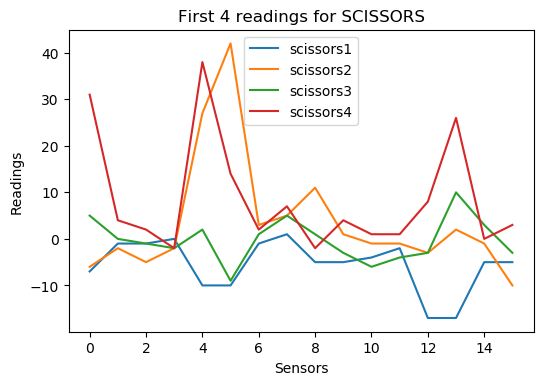

In [76]:
fig, ax = plt.subplots(dpi=100)
line0, = ax.plot(df1[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][0:1].T, label='scissors1')
line1, = ax.plot(df1[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][1:2].T, label='scissors2')
line2, = ax.plot(df1[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][2:3].T, label='scissors3')
line3, = ax.plot(df1[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][3:4].T, label='scissors4')
ax.legend(handles=[line0,line1,line2,line3])
ax.set_xlabel('Sensors')
ax.set_ylabel('Readings')
ax.set_title('First 4 readings for SCISSORS')
fig;

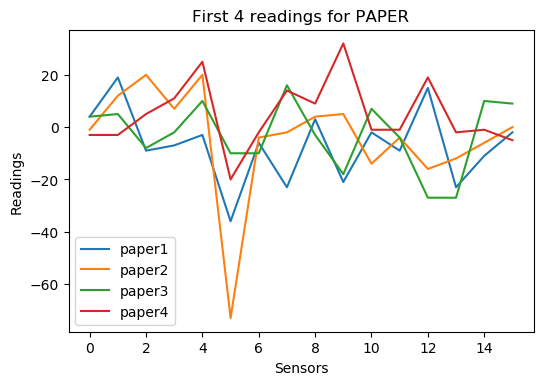

In [77]:
fig, ax = plt.subplots(dpi=100)
line0, = ax.plot(df2[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][0:1].T, label='paper1')
line1, = ax.plot(df2[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][1:2].T, label='paper2')
line2, = ax.plot(df2[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][2:3].T, label='paper3')
line3, = ax.plot(df2[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][3:4].T, label='paper4')
ax.legend(handles=[line0,line1,line2,line3])
ax.set_xlabel('Sensors')
ax.set_ylabel('Readings')
ax.set_title('First 4 readings for PAPER')
fig;

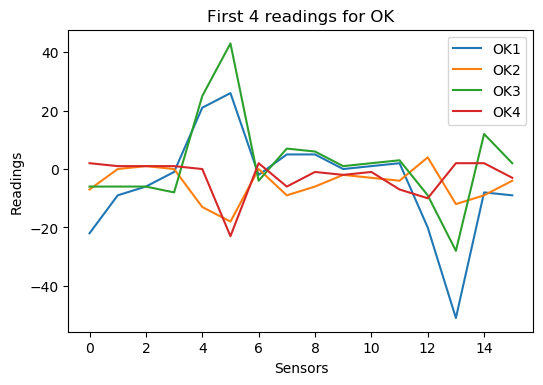

In [78]:
fig, ax = plt.subplots(dpi=100)
line0, = ax.plot(df3[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][0:1].T, label='OK1')
line1, = ax.plot(df3[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][1:2].T, label='OK2')
line2, = ax.plot(df3[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][2:3].T, label='OK3')
line3, = ax.plot(df3[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]][3:4].T, label='OK4')
ax.legend(handles=[line0,line1,line2,line3])
ax.set_xlabel('Sensors')
ax.set_ylabel('Readings')
ax.set_title('First 4 readings for OK')
fig;

### 3. Machine Learning Models

#### Prepare data: features, X, y

In [79]:
features = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
X = df[features]
y = df[64]

In [80]:
def compute_pcc_minacc_perc(target):
    '''Returns PCC and Minimum Accuracy required'''
    counts = Counter(target)
    df_count = pd.DataFrame.from_dict(counts, orient='index')
    pcc_all = (df_count[0]/df_count[0].sum())**2
    pcc = pcc_all.sum()
    print(f'Proportion Chance Criterion = {(100*pcc).round(4)}%')
    print('\nMinimum accuracy to be considered significant is computed by (1.25 * Proportion Chance Criterion)')
    print(f'which is equal to {(125*pcc).round(4)}%')

In [81]:
compute_pcc_minacc_perc(y)

Proportion Chance Criterion = 25.0007%

Minimum accuracy to be considered significant is computed by (1.25 * Proportion Chance Criterion)
which is equal to 31.2508%


#### Split data by 75:25 for the training and test sets. No need for scaling as all of the data are of the same magnitudes.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

### Note that GridSearchCV has been used to locate the best hyperparameters for the following models.

#### KNeighborsClassifier

In [99]:
knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
knn.score(X_test, y_test)

0.6934931506849316

#### Logistic Regression

In [116]:
log1 = LogisticRegression(C=0.01, penalty='l1', solver='liblinear',
                            multi_class='auto').fit(X_train, y_train)
log1.score(X_test, y_test)

0.3386986301369863

In [117]:
log2 = LogisticRegression(C=0.1, penalty='l2', solver='liblinear',
                            multi_class='auto').fit(X_train, y_train)
log2.score(X_test, y_test)

0.3376712328767123

#### Linear SVC

In [118]:
lsvc1 = LinearSVC(C=0.01, penalty='l1', dual=False).fit(X_train, y_train)
lsvc1.score(X_test, y_test)

0.3339041095890411

In [119]:
lsvc2 = LinearSVC(C=0.1, penalty='l2', dual=False).fit(X_train, y_train)
lsvc2.score(X_test, y_test)

0.33287671232876714

#### DecisionTreeClassifier

In [138]:
dt = DecisionTreeClassifier(max_features=0.4).fit(X_train, y_train)
dt.score(X_test, y_test)

0.7828767123287671

#### RandomForestClassifier

In [134]:
rf = RandomForestClassifier(n_estimators=800, max_features=0.4).fit(X_train, y_train)
rf.score(X_test, y_test)

0.916095890410959

#### GradientBoostingClassifier

In [142]:
gs = GradientBoostingClassifier(learning_rate=0.2, max_features=0.4, n_estimators=800).fit(X_train, y_train)
gs.score(X_test, y_test)

0.9654109589041096

In [143]:
y_pred = gs.predict(X_test)

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       719
           1       0.97      0.98      0.97       769
           2       0.97      0.95      0.96       703
           3       0.95      0.94      0.94       729

    accuracy                           0.97      2920
   macro avg       0.97      0.97      0.97      2920
weighted avg       0.97      0.97      0.97      2920



#### Other results in Kaggle Kernels:
TensorFlow NN: **90.92%** <br>
LSTM: **95.62%** <br>
CatBoostClassifier: **95.89%** <br>

### 4. Results and Conclusion
Among all the algorithms used, **GradientBoosting** method proved to be the **best** in terms of accuracy, with a percentage of **96.54%** which is even higher than the methods used in Kaggle, including neural network algorithms.

GBM was even dubbed as better than deep learning in dealing with structured/tabular data like what we worked on in this study. GradientBoosting has been very popular especially in Kaggle tournaments as it is faster to train that neural networks, yet produces one of the highest accuracies.

For further studies, it is recommended to try the XGBoost algorithm which is an upgrade of GBM as well as other neural networks, as these have been what the current AI trend for Prosthesis have been using.

## Applications and Advancements
Looking into the current trend, institutions nowadays aim to **read and write directly from the brain**. Companies like **Neuralink** by Elon Musk and **Kernel** by Bryan Johnson is planning to do this by inserting a chip into the brain. However, a new emerging company, **CTRL-Labs** by Thomas Reardon created a device called CTRL-kit that aim to do the same but without the said implants. The device they invented is non-invasive, and will be available to the public. The CTRL-kit has two abilities: **myocontrol** (controlling the muscles by intention, meaning even being unable to move) and **neocontrol** (controlling the muscles using the brain, directly decoding the individual neurons to control the computer interface)

<img src="robot_hand.png" width="300"/>

*(man with a robot arm)*

<img src="intent.png" width="300"/>

*(capturing the intent to open the hand without being able to actually move)*

<img src="no_hands.png" width="300"/>

*(playing a game without actually pressing the spacebar)*

**We as students are learning the foundations of machine learning, but actually, there are a lot of advancements now in the field of Artificial Intelligence. Everything now is only limited by our imagination. Just think of the possibilities of Neurointerfaces, breaking the boundaries between our imagination and physical capabilities.**

## References and Acknowledgements
    
**Prostheses:** https://en.wikipedia.org/wiki/Prosthesis#Robotic_prostheses <br>
**Kaggle dataset:** https://www.kaggle.com/kyr7plus/emg-4 <br>
**Kirill Yashuk's Profile:** https://www.kaggle.com/kyr7plus <br>
**Kaggle dataset Kernels:** https://www.kaggle.com/kyr7plus/emg-4/kernels <br>
**GBM:** http://datascience.la/meetup-machine-learning-best-algorithms-gradient-boosting-machines-gbm/ <br>
**Robot hand:** https://www.youtube.com/watch?v=xKUn0-Bhb7U&t=  <br>
**CTRL-Labs:** https://www.youtube.com/watch?v=D8pB8sNBGlE  <br>
MSDS 2020, especially my LT-mates <br>
AIM MSDS Faculty and Staff <br>
Prof. Eduardo David <br>
Prof. Chris Monterola <br>
Prof. Erika Legara <br>
ACCeSs Lab <br>